In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()
       
        m2      = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm2, ym2  = m2(LON, LAT)
        im2     = m2.plot(xm2,ym2,'.', color='k',linewidth=2.)

        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

In [38]:
def investigate_traj(figsize, proj, nb_traj, hfacc_level):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    import cmocean
    
    fig     = plt.figure(figsize=figsize)
    
    if proj=='ortho':
        m       = Basemap(projection='ortho', lat_0=-90, lon_0=0, resolution="l")
    elif proj=='merc':
        m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    elif proj=='lamb':
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)
    

    
    # Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
    xm, ym  = m(Xf, Yf)
    im      = m.contourf(xm, ym, hFacC[hfacc_level,...], extend='both', cmap='Greys_r')
    
    # Plot the salinity
    xm, ym  = m(XC, YC)
    im      = m.contourf(xm, ym, mean_Salt_30, levels=np.linspace(32.8,35.3,50), extend='both', cmap=cmocean.cm.haline)
    cbar    = m.colorbar(im,pad='10%')
    cbar.set_label('Salinity', fontsize =16)
        
    # Plot all the traj
    for p in nb_traj: 
        xm, ym  = m(LON[:,p], LAT[:,p])
        im      = m.plot(xm, ym, '-', color='orange',linewidth=0.4)
        xm, ym  = m(LON[0,p], LAT[0,p])
        im      = m.plot(xm, ym, '.', color='yellow',linewidth=2.)
        xm, ym  = m(LON[-1,p], LAT[-1,p])
        im      = m.plot(xm, ym, '*', color='r',linewidth=3.)
        
    m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(120.,280.,10), labels=[0, 0, 0, 1])
    #plt.title('10 000 parti, 5 years (hFacC and S at 30 m)', fontsize=18)
    #plt.savefig(path_save + title_save, bbox_inches='tight')

In [4]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [5]:
# Mercator salinity
mean_Salt_surf = pickle_load('mean_Salt_surf_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_30     = pickle_load('mean_Salt_30_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_100   = pickle_load('mean_Salt_100_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_200   = pickle_load('mean_Salt_200_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_500   = pickle_load('mean_Salt_500_2', '/data/ebent/Bigger_domain/', verbose=False)

# Mercator temperature
mean_Theta_surf = pickle_load('mean_Theta_surf_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_30     = pickle_load('mean_Theta_30_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_100   = pickle_load('mean_Theta_100_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_200   = pickle_load('mean_Theta_200_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_500   = pickle_load('mean_Theta_500_2', '/data/ebent/Bigger_domain', verbose=False)

In [6]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

In [7]:
# This is hFacC for the SOUTHERN HEMISPHERE

file_h = h5py.File(load_path3 + 'grid.mat','r')

hFacC = file_h.get('hFacC')
hFacC = np.array(hFacC)
Xf = file_h.get('XC')
Xf = np.array(Xf)
Yf = file_h.get('YC')
Yf = np.array(Yf)

In [8]:
# On selectionne la bonne taille de hFacC == taille de "bigger domain"
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04
XC, YC    = np.meshgrid(XC, YC)

hfacc = hFacC[:, lat_min:lat_max, lon_min:lon_max]

In [9]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)
southern_front = np.ma.masked_array(southern_front, mask=False)

In [10]:
E_boundary = 12 # 121,04 degrees
W_boundary = 1560 # 250,04 degrees

In [11]:
# Create a meshgrid to plot in index coordinates
xc = np.arange(1801)
yc = np.arange(1024)
xc, yc = np.meshgrid(xc,yc)

In [12]:
npts = 10000

***

# Plots

# Different zones

In [134]:
look_index = np.where(southern_front[:,E_boundary]==0)[0]
look_index2 = np.where(southern_front[:,W_boundary]==0)[0]

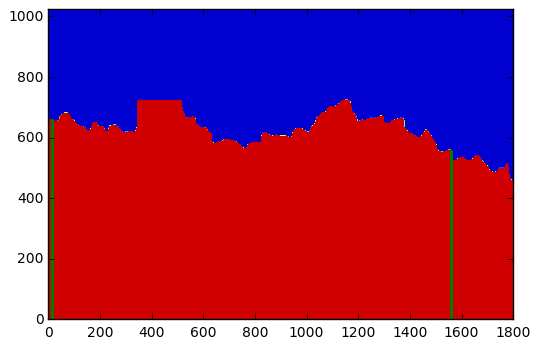

In [137]:
plt.contourf(xc, yc, southern_front)
tmp = np.ones(look_index[0])*E_boundary
tmp2 = np.ones(look_index2[0])*W_boundary
plt.plot(tmp, yc[:look_index[0],:], '-g')
plt.plot(tmp2, yc[:look_index2[0],:], '-g')
plt.show()

# Plot of the traj of the experiment 

In [89]:
XC, YC    = np.meshgrid(XC, YC)

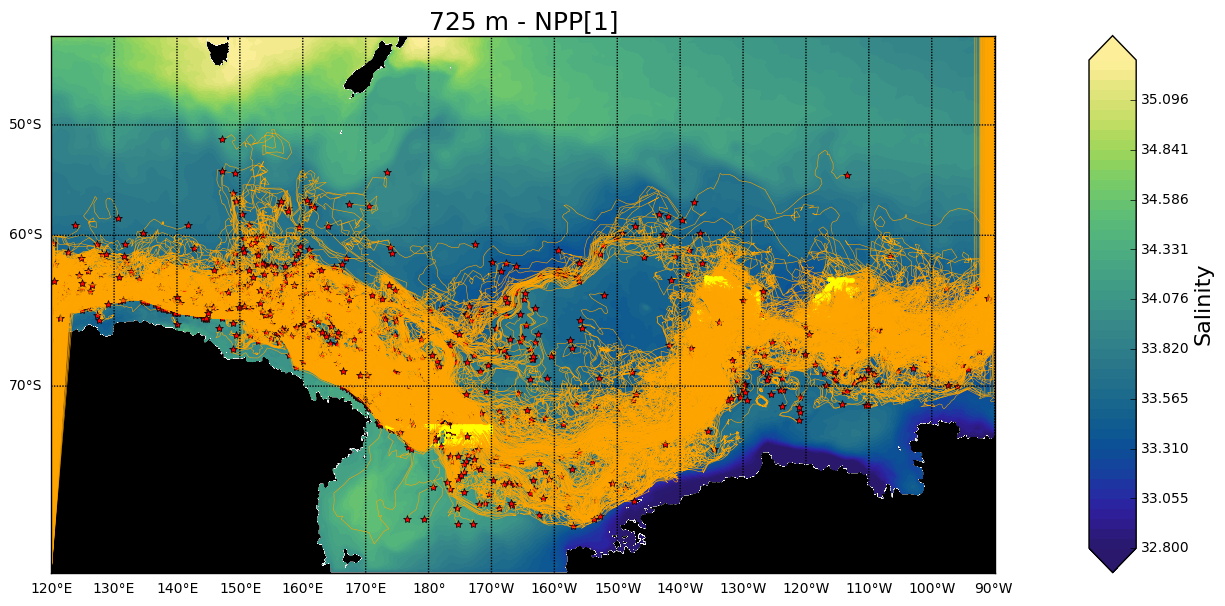

In [410]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(4000, 6000), hfacc_level=9)
plt.title('725 m - NPP[1]', fontsize=18)

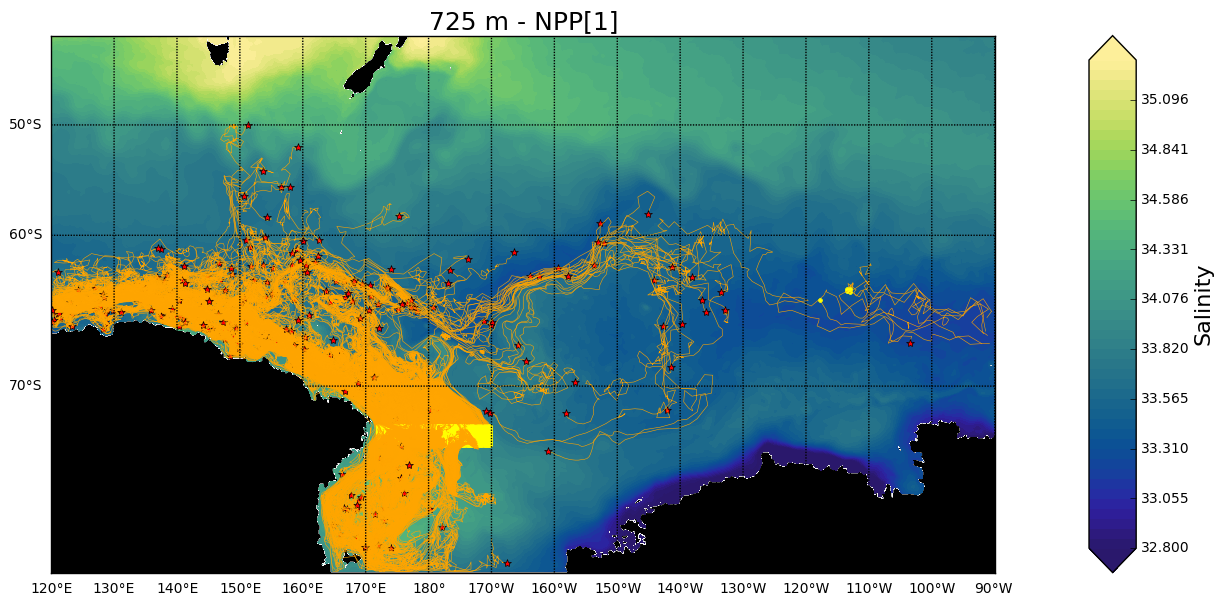

In [38]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(4000, 6000), hfacc_level=9)
plt.title('725 m - NPP[4]', fontsize=18)

### This run has been modified from original Octopus version : added a line to deal with parti that have z > 0

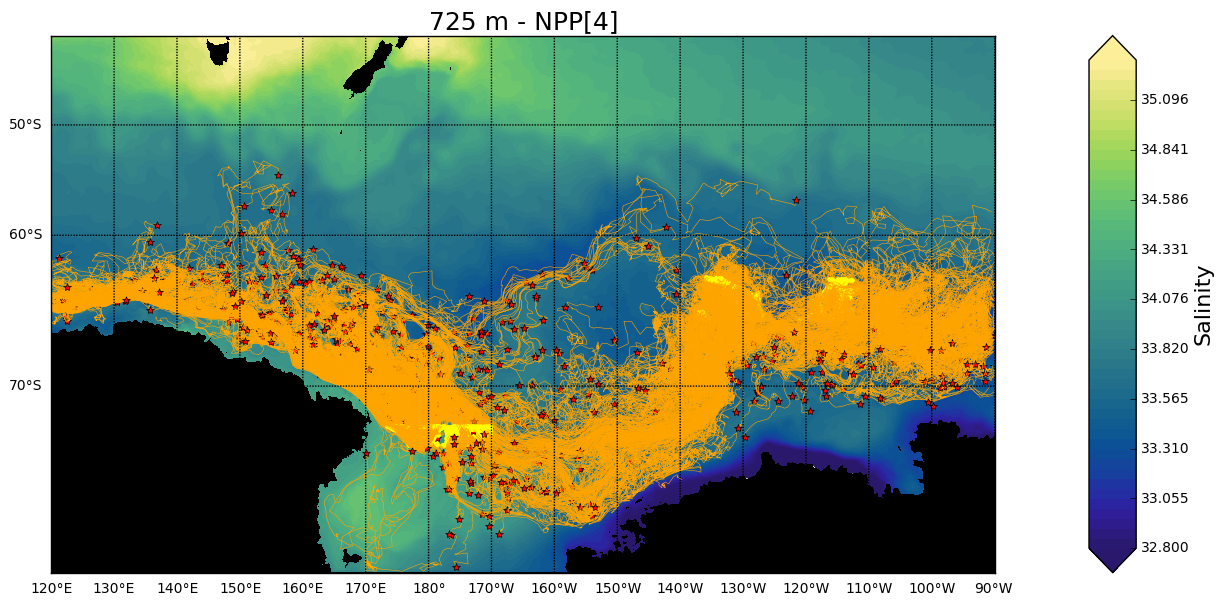

In [21]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(4000, 6000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

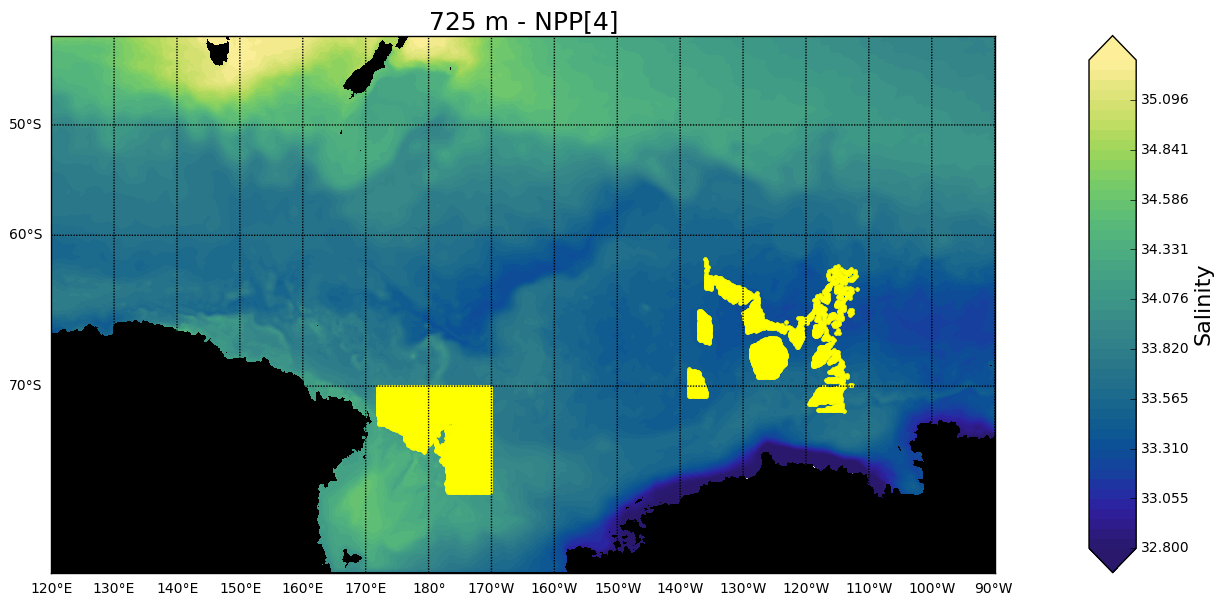

In [24]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(10000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

### This run has not been modified from original Octopus version

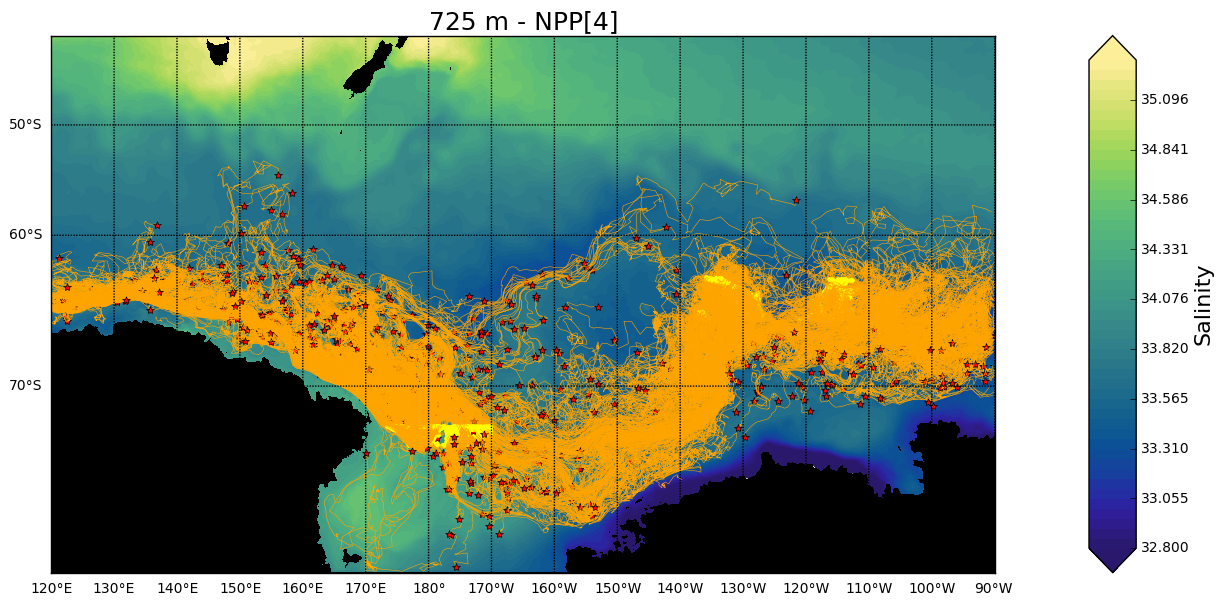

In [39]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(4000, 6000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

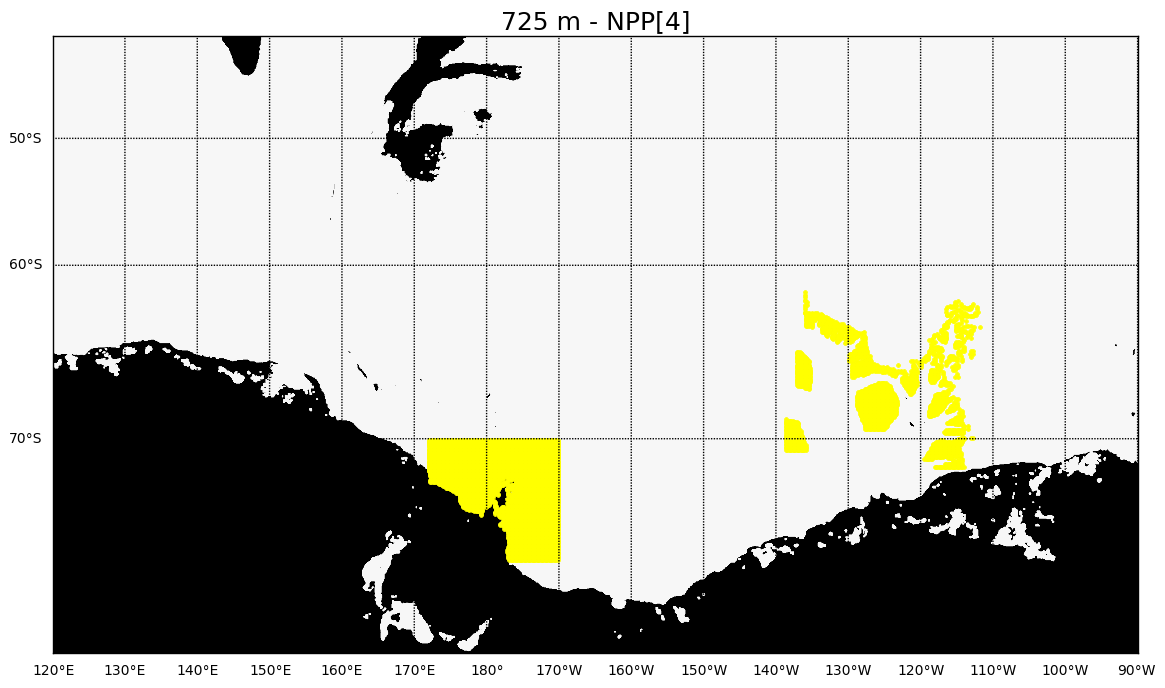

In [35]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(10000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

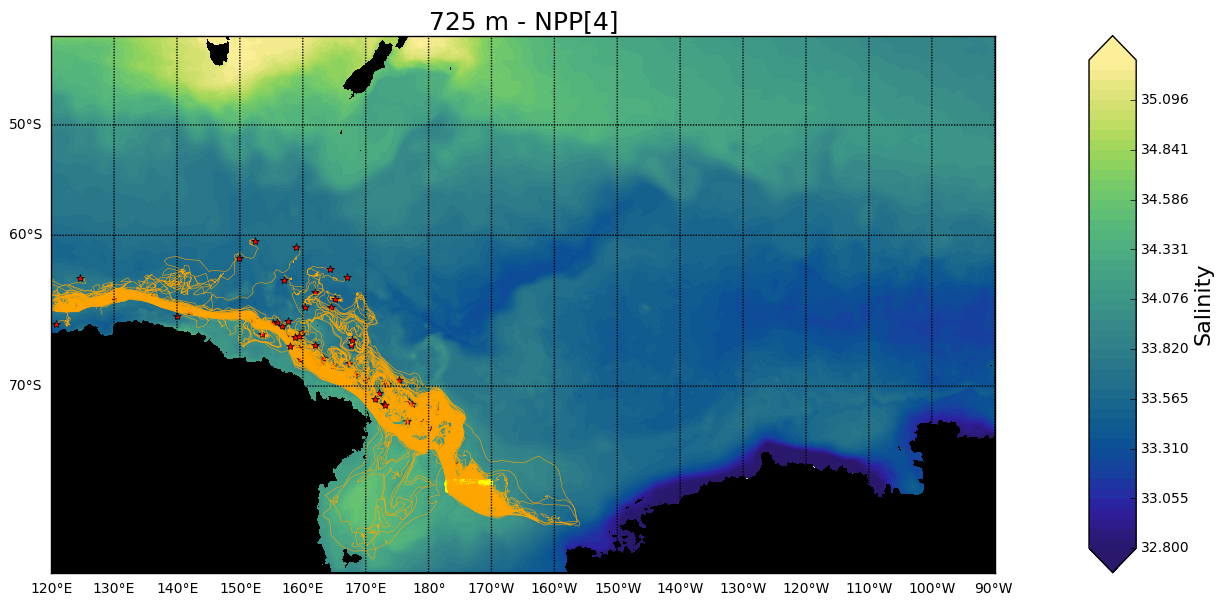

In [77]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(1000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

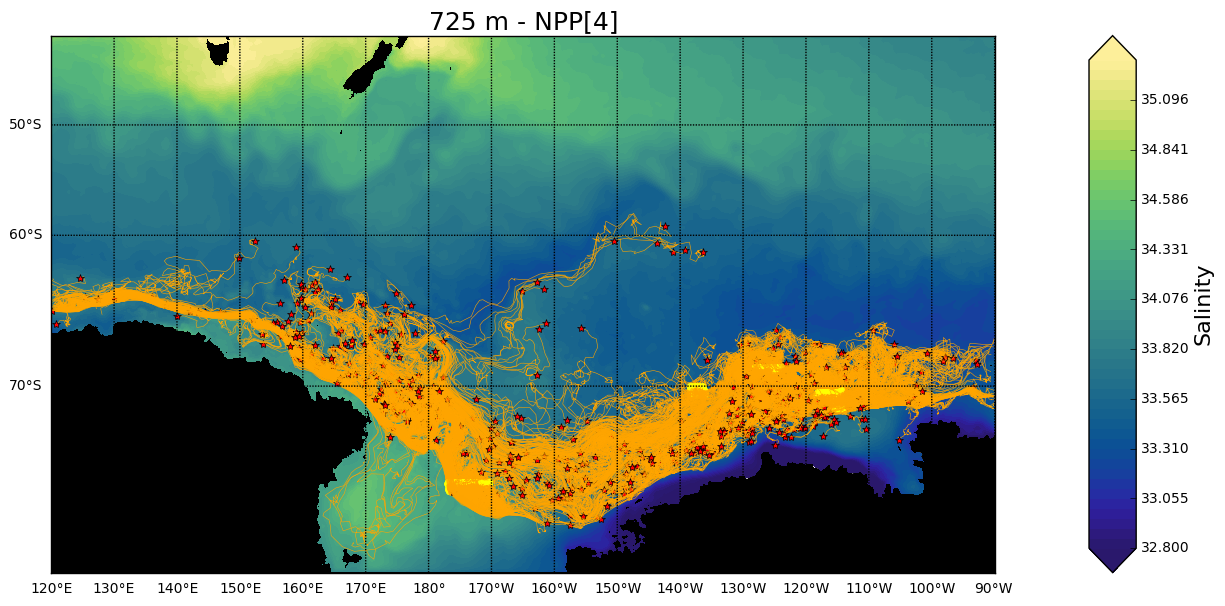

In [90]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(1000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

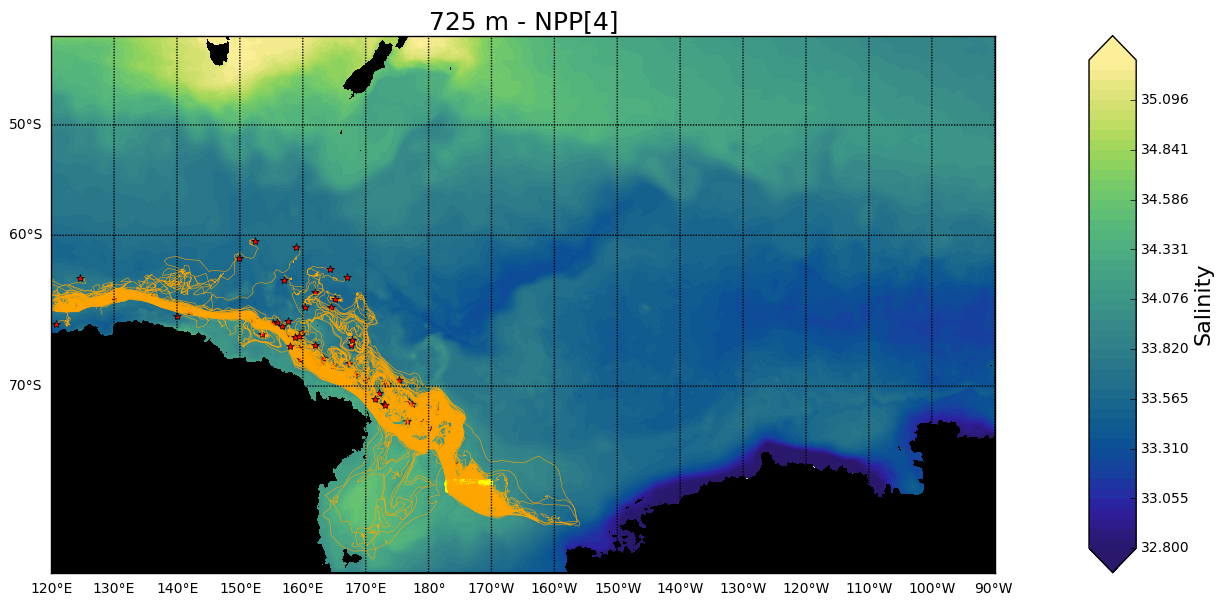

In [94]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(1000), hfacc_level=65)
plt.title('725 m - NPP[4]', fontsize=18)

***

# Mettre un mask sur les traj

Il a fallut mettre hFacC sur la même taille que mercator, on l'appelle hfacc

In [209]:
run /home/ebent/Octopus/Octopus-master/scripts/p_xy.py

data has 172 records
glued data : 725m_12_10_4_0004.XYZ.0000000001.0000001801.data
location of data : /data/ebent/Octopus/output/725m_12_10_4/
Number of parti with z < 0 : 0
Number of parti with z > 103 (bottom of ocean) : 0


In [82]:
LON = np.ma.masked_array(lon, mask=False)
LAT = np.ma.masked_array(lat, mask=False)
DEP = np.ma.masked_array(dep, mask=False)

x = np.ma.masked_array(xround, mask=False)
y = np.ma.masked_array(yround, mask=False)
z = np.ma.masked_array(zround, mask=False)

# Only do this now that I changed p_xy.py

### Here I put a mask on hfacc==0

In [84]:
for p in range(LON.shape[1]):
    for t in range(LON.shape[0]):
        if LON.mask[t,p]==True: 
            continue
        if hfacc[zround[t,p], yround[t,p], xround[t,p]]==0.:
            #print t,p
            LON.mask[t:,p]=True

### Here I mask all time steps after the first LON.mask[t,p]==True for each parti AGAIN

In [85]:
# Mask toutes les pos des partis une fois que leur premier temps t a été masqué
#tmp_p = []
#tmp_t = []
for p in range(LON.shape[1]):
    for t in range(LON.shape[0]):
        if LON.mask[t,p]==True:
            #print t,p
            #tmp_p.append(p)
            #tmp_t.append(t)
            LON.mask[t:,p]=True
            break

### Here I mask particles that have an initial pos out of the box I chose (this happens because of the pb of bathymetry in initial pos)

In [91]:
parti = []
for p in range(LON.shape[1]):
    if LON[0,p]<172. or LON[0,p]>190. or LAT[0,p]<-75. or LAT[0,p]>-70.:
        LON.mask[:,p]=True
        parti.append(p)

In [96]:
len(parti)

3070

On applique le mask de LON pour les autres variables

In [92]:
# Make sure all pos have the same mask
LAT.mask = LON.mask
DEP.mask = LON.mask

xround.mask = LON.mask
yround.mask = LON.mask
zround.mask = LON.mask

In [93]:
x.mask = LON.mask
y.mask = LON.mask
z.mask = LON.mask

***

In [35]:
path = '/data/ebent/Octopus/output/12_10_4mld/'

pickle_save('DEP_12_10_4', path, DEP)
pickle_save('LAT_12_10_4', path, LAT)
pickle_save('LON_12_10_4', path, LON)

pickle_save('z_12_10_4', path, z)
pickle_save('y_12_10_4', path, y)
pickle_save('x_12_10_4', path, x)

('saved at : ', '/data/ebent/Octopus/output/12_10_4mld/DEP_12_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/12_10_4mld/LAT_12_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/12_10_4mld/LON_12_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/12_10_4mld/z_12_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/12_10_4mld/y_12_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/12_10_4mld/x_12_10_4.npy')


***

# Counts the number of parti in each zone

This counts how many particles finish/stay in each zone

In [198]:
zone1 = 0
zone2 = 0
zone3 = 0
zone4 = 0
zone5 = 0
error = 0


for p in range(npts): #x.shape[1]):
    #a = zone1
    #b = zone2
    #c = zone3
    #d = zone4
    
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = yround[:,p].mask # mask elements of south_front that are irrelevant
    
    # This finds if the pos of the parti reaches outside of the ACC front where southern_front == 0
    north_outside_RG = np.squeeze(np.array(np.ma.where(south_front==0))) # don't forget to use np.ma when dealing with masks
    
    # This finds if the pos of the parti goes past E_boundary
    east_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]<=E_boundary)))  
    
    # This finds if the pos of the parti goes past W_boundary
    west_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]>=W_boundary)))  
    
    #print p
    #print 'north :',north_outside_RG.size,', east :',east_outside_RG.size,', west :',west_outside_RG.size
     
    if north_outside_RG.size==0. and east_outside_RG.size==0. and west_outside_RG.size==0.:
        #print 'particle in Ross Gyre'
        zone1+=1
        
    if north_outside_RG.size>0.:
    #    print 'particle outside of Ross Gyre to the North'
        zone2+=1
        
    if north_outside_RG.size==0. and east_outside_RG.size>0. and west_outside_RG.size==0.:
        #print 'particle outside of Ross Gyre to the East'
        zone3+=1
        
    if north_outside_RG.size==0. and east_outside_RG.size==0. and west_outside_RG.size>0.:
        #print 'particle outside of Ross Gyre to the West'
        zone4+=1
        
    if north_outside_RG.size==0. and east_outside_RG.size>0. and west_outside_RG.size>0.:
        #print 'particle outside of Ross Gyre to the East then West'
        zone5+=1  
        
    ########## Total number of particles was 10 002 so I looked for the reason and found that some parti go E and W
    #X = (zone1-a)+(zone2-b)+(zone3-c)+(zone4-d)
    #if X>1:
    #    print p
    
print ''     
print 'Particles that stay in the Ross Gyre :', zone1
print 'Particles that go North :', zone2
print 'Particles that go East :', zone3
print 'Particles that go West :', zone4
print 'Particles that go East then West :', zone5
print 'Total number of particles :', zone1+zone2+zone3+zone4+zone5


Particles that stay in the Ross Gyre : 8361
Particles that go North : 80
Particles that go East : 1502
Particles that go West : 57
Particles that go East then West : 0
Total number of particles : 10000


### Same but in percentages

In [199]:
print 'Particles that stay in the Ross Gyre :', zone1*100./npts, '%'
print 'Particles that go North :', zone2*100./npts, '%'
print 'Particles that go East :', zone3*100./npts, '%'
print 'Particles that go West :', zone4*100./npts, '%'
print 'Particles that go East then West :', zone5*100./npts, '%'
print 'Total number of particles :', zone1+zone2+zone3+zone4+zone5

Particles that stay in the Ross Gyre : 83.61 %
Particles that go North : 0.8 %
Particles that go East : 15.02 %
Particles that go West : 0.57 %
Particles that go East then West : 0.0 %
Total number of particles : 10000


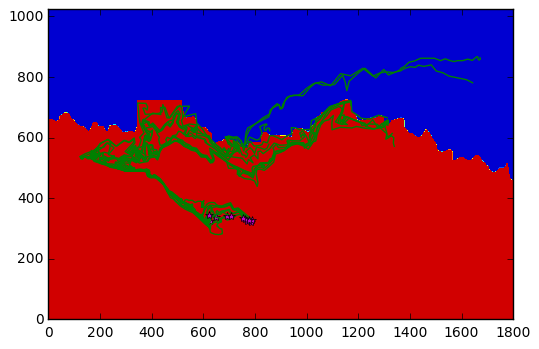

In [324]:
for p in humhum:
    plt.contourf(xc, yc, southern_front)
    plt.plot(xround[:,p],yround[:,p], '-g')
    plt.plot(xround[0,p],yround[0,p], '*m')
    #plt.plot(xround[77:,p],yround[77:,p], '.k')

## Test some specific particles

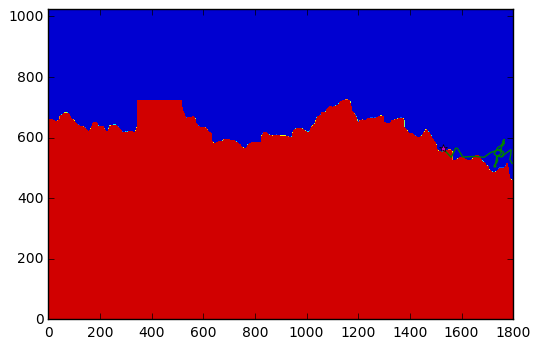

In [225]:
p = 6165
plt.contourf(xc, yc, southern_front)
plt.plot(xround[:,p],yround[:,p], '-g')
plt.plot(xround[0,p],yround[0,p], '*m')
#plt.plot(xround[77:,p],yround[77:,p], '.k')

***

# Try to count but with the dimension of time

# Search for the indexes of the particles in each zone

This selects the index p of the particles that finish/stay in each zone

In [200]:
parti_of_zone1 = []
parti_of_zone2 = []
parti_of_zone3 = []
parti_of_zone4 = []
parti_of_zone5 = []

for p in range(npts):    
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
    
    # This finds if the pos of the parti reaches outside of the ACC front where southern_front == 0
    north_outside_RG = np.squeeze(np.array(np.ma.where(south_front==0))) # don't forget to use np.ma when dealing with masks
    
    # This finds if the pos of the parti goes past XC = 150
    east_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]<=E_boundary)))  
    
    # This finds if the pos of the parti goes past XC = 250
    west_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]>=W_boundary)))  
    
    #print p
    #print 'north :',north_outside_RG.size,', east :',east_outside_RG.size,', west :',west_outside_RG.size
       
    if north_outside_RG.size==0. and east_outside_RG.size==0. and west_outside_RG.size==0.:
    #print 'particle in Ross Gyre'
       parti_of_zone1.append(p)
        
    if north_outside_RG.size>0.:
    #    print 'particle outside of Ross Gyre to the North'
        parti_of_zone2.append(p)
        
    if north_outside_RG.size==0. and east_outside_RG.size>0. and west_outside_RG.size==0.:
        #print 'particle outside of Ross Gyre to the East'
        parti_of_zone3.append(p)
        
    if north_outside_RG.size==0. and east_outside_RG.size==0. and west_outside_RG.size>0.:
        #print 'particle outside of Ross Gyre to the West'
        parti_of_zone4.append(p)
    
    if north_outside_RG.size==0. and east_outside_RG.size>0. and west_outside_RG.size>0.:
        parti_of_zone5.append(p)

        
print ''     
print 'Particles that stay in the Ross Gyre :', len(parti_of_zone1)
print 'Particles that go North :', len(parti_of_zone2)
print 'Particles that go East :', len(parti_of_zone3)
print 'Particles that go West :', len(parti_of_zone4)
print 'Particles that go East then West :', len(parti_of_zone5)
print 'Total number of particles :', len(parti_of_zone1)+len(parti_of_zone2)+len(parti_of_zone3)+len(parti_of_zone4)+len(parti_of_zone5)


Particles that stay in the Ross Gyre : 8361
Particles that go North : 80
Particles that go East : 1502
Particles that go West : 57
Particles that go East then West : 0
Total number of particles : 10000


## For each zone, calculate at each time step how many particles are in the zone

In [71]:
evo_zone1 = np.zeros(xround.shape[0])
evo_zone1[0] = 0
for p in parti_of_zone1:
    #print p
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
    
    for t in range(xround.shape[0]):
        #print xround[t,p]
        if south_front[t]!=0 and xround[t,p]>E_boundary and xround[t,p]<W_boundary:
            #print t, p
            evo_zone1[t]=evo_zone1[t]+1
        else:
            evo_zone1[t]=evo_zone1[t]

In [72]:
# Particles that go North
evo_zone2 = np.zeros(xround.shape[0])

for p in parti_of_zone2:
    #print p
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
    
    for t in range(xround.shape[0]):
        #print xround[t,p]
        if south_front[t]==0:
            #print 't :', t, p
            evo_zone2[t]=evo_zone2[t]+1
        else:
            evo_zone2[t]=evo_zone2[t]
        #print 'evo', evo_zone2[t], 'p : ', p

In [73]:
# Particles that go East
evo_zone3 = np.zeros(xround.shape[0])

for p in parti_of_zone3:
    #print p
    for t in range(xround.shape[0]):
        
        #print xround[t,p]
        if xround[t,p]<=E_boundary:
            #print t, p
            evo_zone3[t]=evo_zone3[t]+1
        else:
            evo_zone3[t]=evo_zone3[t]

In [74]:
# Particles that go West
evo_zone4 = np.zeros(xround.shape[0])

for p in parti_of_zone2:
    #print p
    for t in range(xround.shape[0]):
        
        #print xround[t,p]
        if xround[t,p]>=W_boundary:
            #print t, p
            evo_zone4[t]=evo_zone4[t]+1
        else:
            evo_zone4[t]=evo_zone4[t]

In [75]:
# Particles that go East then West
evo_zone5 = np.zeros(xround.shape[0])

for p in parti_of_zone5:
    #print p
    for t in range(xround.shape[0]):
        
        #print xround[t,p]
        if xround[t,p]<=E_boundary and xround[t,p]>=W_boundary:
            #print t, p
            evo_zone5[t]=evo_zone5[t]+1
        else:
            evo_zone5[t]=evo_zone5[t]

In [76]:
total = np.ones(xround.shape[0])*10000

In [77]:
total = total-evo_zone2-evo_zone3-evo_zone4-evo_zone5

In [78]:
total[0], evo_zone2[0], evo_zone3[0], evo_zone4[0], evo_zone5[0]

(9999.0, 1.0, 0.0, 0.0, 0.0)

***

# Reprendre la !

# After meeting, try to get according to time right

In [224]:
#Z1 = np.zeros(xround.shape[0])
#Z2 = np.zeros(xround.shape[0])
#Z3 = np.zeros(xround.shape[0])
#Z4 = np.zeros(xround.shape[0])
#E_N = np.zeros(xround.shape[0])
z2 = np.zeros(xround.shape[0])

for p in range(npts):
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
    
    for t in range(xround.shape[0]):
        #if south_front[t]!=0 and xround[t,p]>E_boundary and xround[t,p]<W_boundary:
        #    Z1[t]+=1
            
        if south_front[t]==0:
            print t,p, 'north'
            z2[t:]+=1
            break
        #elif xround[t,p]<=E_boundary:
        #    #print t, p, 'out to the east'
        #    Z3[t:]+=1
        #    break
        #elif xround[t,p]>=W_boundary:
        #    #print 'west'
        #    Z4[t:]+=1
        #    break
        #elif xround[t,p]<=E_boundary and xround[t,p]>=W_boundary:
        #    #print 'east and west'
        #    E_N[t:]+=1
        #    break

115 1712 north
137 3165 north
141 4036 north
171 4050 north
153 4108 north
136 4303 north
125 4563 north
71 4707 north
154 4790 north
83 4899 north
152 5104 north
136 5105 north
1 5363 north
12 5364 north
9 5463 north
139 5516 north
171 5615 north
134 5726 north
159 5761 north
168 5832 north
165 5852 north
163 5997 north
109 5998 north
123 6103 north
0 6165 north
170 6300 north
134 6320 north
158 6491 north
88 6599 north
118 6699 north
152 6701 north
158 6890 north
159 6910 north
118 7020 north
165 7056 north
109 7134 north
76 7343 north
168 7355 north
146 7451 north
125 7594 north
154 7602 north
151 7684 north
149 7758 north
159 7779 north
157 7793 north
105 7886 north
109 7888 north
128 7971 north
165 8071 north
159 8217 north
168 8275 north
142 8305 north
159 8367 north
136 8384 north
82 8432 north
123 8466 north
171 8534 north
148 8552 north
165 8561 north
152 8563 north
113 8717 north
131 8870 north
82 8875 north
95 8969 north
134 9012 north
103 9136 north
153 9164 north
149 9263 

In [135]:
p = 0
south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
for t in range(xround.shape[0]):
    if south_front[t]!=0 and xround[t,p]>E_boundary and xround[t,p]<W_boundary:
        print t

In [150]:
p = 6007
south_front = southern_front[yround[:,p],xround[:,p]]
south_front.mask = xround[:,p].mask

In [151]:
south_front

masked_array(data = [1.0 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --],
             mask = [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  T

In [152]:
xround[:,6007]

masked_array(data = [638 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --],
             mask = [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  T

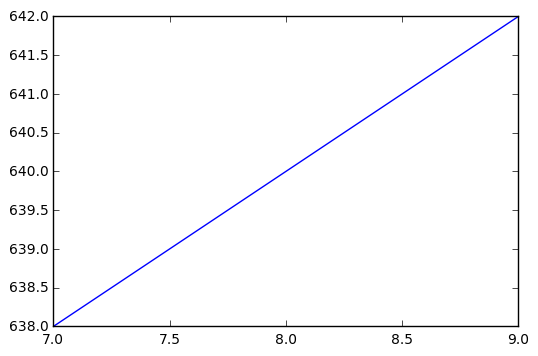

In [146]:
plt.plot(xround[0,6000:6010])

In [181]:
Z1 = np.zeros(xround.shape[0])
Z2 = np.zeros(xround.shape[0])
Z3 = np.zeros(xround.shape[0])
Z4 = np.zeros(xround.shape[0])
E_N = np.zeros(xround.shape[0])
dead = np.zeros(xround.shape[0])
#z2 = np.zeros(xround.shape[0])

for p in range(npts):
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
    #print ''
    #print 'nb of parti :', p
    for t in range(xround.shape[0]):
        if south_front[t]!=0 and xround[t,p]>E_boundary and xround[t,p]<W_boundary:
            #print t, 'in RG'
            Z1[t]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]
        
        elif south_front[t]==0:
            #print t, 'north'
            Z2[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]
            break
        elif xround[t,p]<=E_boundary:
            #print t,'out to the east'
            Z3[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]
            break
        elif xround[t,p]>=W_boundary:
            #print t, 'west'
            Z4[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]
            break
        elif xround[t,p]<=E_boundary and xround[t,p]>=W_boundary:
            #print t, 'east and west'
            E_N[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]
            break
            
        elif xround.mask[t,p]==True:
            #print t, 'parti is dead !'
            dead[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]
            #print Z1[t-1], Z2[t-1], Z3[t-1], Z4[t-1], E_N[t-1], dead[t-1]
            break
        ##print Z1[t], Z2[t], Z3[t], Z4[t], E_N[t], dead[t]

In [189]:
Z1[0], Z2[0], Z3[0], Z4[0], E_N[0], dead[0]

(6930.0, 0.0, 0.0, 0.0, 0.0, 3070.0)

In [190]:
Z1[-1], Z2[-1], Z3[-1], Z4[-1], E_N[-1], dead[-1]

(1978.0, 128.0, 1858.0, 0.0, 0.0, 6036.0)

### Verifie si les parti sont conservatives

In [182]:
Z1[0]+Z2[0]+Z3[0]+Z4[0]+E_N[0]+dead[0]

10000.0

In [183]:
Z1[-1]+Z2[-1]+Z3[-1]+Z4[-1]+E_N[-1]+dead[-1]

10000.0

In [184]:
Z1[44]+Z2[44]+Z3[44]+Z4[44]+E_N[44]+dead[44]

10000.0

In [185]:
Z1[100]+Z2[100]+Z3[100]+Z4[100]+E_N[100]+dead[100]

10000.0


Total nb of particles that stay in the Ross Gyre : 19.78 %
Total nb of particles that go North : 1.28 %
Total nb of particles that go East : 18.58 %
Total nb of particles that go West : 0.0 %
Total nb of particles that go East then West : 0.0 %
Total number of particles : 10000.0


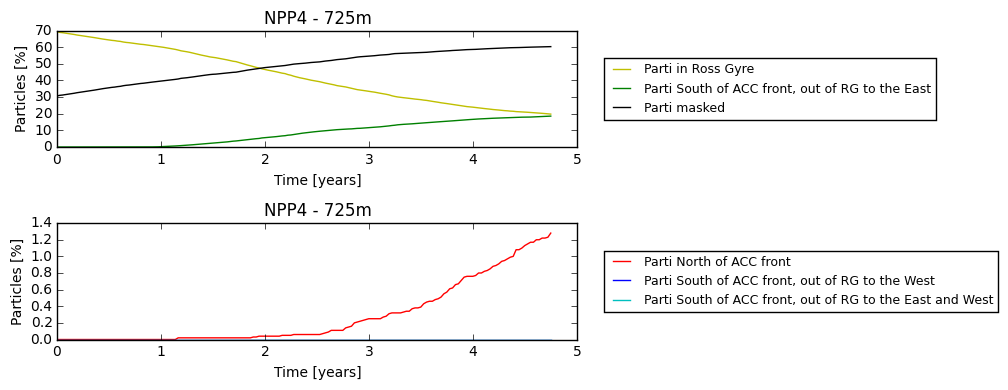

In [199]:
fig  = plt.figure()
time = (np.arange(xround.shape[0])*10)/360.

plt.subplot(2,1,1)
plt.plot(time, Z1*100./npts, '-y', label='Parti in Ross Gyre')
#plt.plot(time, Z2*100./npts, '-r', label='Parti North of ACC front')
plt.plot(time, Z3*100./npts, '-g', label='Parti South of ACC front, out of RG to the East')
#plt.plot(time, Z4*100./npts, '-b', label='Parti South of ACC front, out of RG to the West')
#plt.plot(time, E_N*100./npts, '-c', label='Parti South of ACC front, out of RG to the East and West')
plt.plot(time, dead*100./npts, '-k', label='Parti masked')

plt.legend(bbox_to_anchor=(1.04,0.5), loc='center left', fontsize=9)
plt.xlabel('Time [years]')
plt.ylabel('Particles [%]')
plt.title('NPP4 - 725m')

plt.subplot(2,1,2)
#plt.plot(time, Z1*100./npts, '-y', label='Parti in Ross Gyre')
plt.plot(time, Z2*100./npts, '-r', label='Parti North of ACC front')
#plt.plot(time, Z3*100./npts, '-g', label='Parti South of ACC front, out of RG to the East')
plt.plot(time, Z4*100./npts, '-b', label='Parti South of ACC front, out of RG to the West')
plt.plot(time, E_N*100./npts, '-c', label='Parti South of ACC front, out of RG to the East and West')
#plt.plot(time, dead*100./npts, '-k', label='Parti masked')

plt.legend(bbox_to_anchor=(1.04,0.5), loc='center left', fontsize=9)
plt.xlabel('Time [years]')
plt.ylabel('Particles [%]')
plt.title('NPP4 - 725m')

fig.tight_layout()

print ''
print 'Total nb of particles that stay in the Ross Gyre :', Z1[-1]*100./npts, '%'
print 'Total nb of particles that go North :', Z2[-1]*100./npts, '%'
print 'Total nb of particles that go East :', Z3[-1]*100./npts, '%'
print 'Total nb of particles that go West :', Z4[-1]*100./npts, '%'
print 'Total nb of particles that go East then West :', E_N[-1]*100./npts, '%'
print 'Total number of particles :', Z1[-1]+Z2[-1]+Z3[-1]+Z4[-1]+E_N[-1]+dead[-1]

## Save

In [208]:
NPP = 'NPP4'

In [291]:
pickle_save(NPP + '_evo_zone1', '/data/ebent/Particle_analysis/', evo_zone1)
pickle_save(NPP + '_evo_zone2', '/data/ebent/Particle_analysis/', evo_zone2)
pickle_save(NPP + '_evo_zone3', '/data/ebent/Particle_analysis/', evo_zone3)
pickle_save(NPP + '_evo_zone4', '/data/ebent/Particle_analysis/', evo_zone4)
pickle_save(NPP + '_evo_zone5', '/data/ebent/Particle_analysis/', evo_zone5)

('saved at : ', '/data/ebent/Particle_analysis/NPP1_evo_zone1.npy')
('saved at : ', '/data/ebent/Particle_analysis/NPP1_evo_zone2.npy')
('saved at : ', '/data/ebent/Particle_analysis/NPP1_evo_zone3.npy')
('saved at : ', '/data/ebent/Particle_analysis/NPP1_evo_zone4.npy')
('saved at : ', '/data/ebent/Particle_analysis/NPP1_evo_zone5.npy')


### Function to plot

In [69]:
time = (np.arange(xround.shape[0])*10)/360.
def plot1(title):
    #plt.plot(time, evo_zone1*100/npts, '-m')
    time = (np.arange(len(evo_zone2))*10)/360.
    
    plt.plot(time, evo_zone2*100./npts, '-r', label='Parti North of ACC front')
    plt.plot(time, evo_zone3*100./npts, '-g', label='Parti South of ACC front, out of RG to the East')
    plt.plot(time, evo_zone4*100./npts, '-b', label='Parti South of ACC front, out of RG to the West')
    plt.plot(time, evo_zone5*100./npts, '-c', label='Parti South of ACC front, out of RG to the East and West')
    plt.plot(time, total*100./npts, '-k', label='Parti in Ross Gyre')
    
    #plt.legend(bbox_to_anchor=(1.04,0.5), loc='center left', fontsize=9)
    plt.xlabel('Time [years]')
    plt.ylabel('Particles [%]')
    plt.title(title)

## Load

In [67]:
NPPs = ['NPP1', 
        'NPP2', 
        'NPP3', 
        'NPP4', 
        'NPP5', 
        'NPP6',
        'NPP7',
        'NPP8',
        'NPP9',
        'NPP10',
        'NPP11',
        'NPP12']

In [80]:
NPP = 'NPP4'
folder = '255m/'

evo_zone1 = pickle_load(NPP + '_evo_zone1', '/data/ebent/Particle_analysis/' + folder)
evo_zone2 = pickle_load(NPP + '_evo_zone2', '/data/ebent/Particle_analysis/' + folder)
evo_zone3 = pickle_load(NPP + '_evo_zone3', '/data/ebent/Particle_analysis/' + folder)
evo_zone4 = pickle_load(NPP + '_evo_zone4', '/data/ebent/Particle_analysis/' + folder)
evo_zone5 = pickle_load(NPP + '_evo_zone5', '/data/ebent/Particle_analysis/' + folder)

('loaded from : ', '/data/ebent/Particle_analysis/255m/NPP4_evo_zone1.npy')
('loaded from : ', '/data/ebent/Particle_analysis/255m/NPP4_evo_zone2.npy')
('loaded from : ', '/data/ebent/Particle_analysis/255m/NPP4_evo_zone3.npy')
('loaded from : ', '/data/ebent/Particle_analysis/255m/NPP4_evo_zone4.npy')
('loaded from : ', '/data/ebent/Particle_analysis/255m/NPP4_evo_zone5.npy')


## Make figure with several NPP

IOError: [Errno 2] No such file or directory: '/data/ebent/Particle_analysis/30m/NPP4_evo_zone1.npy'

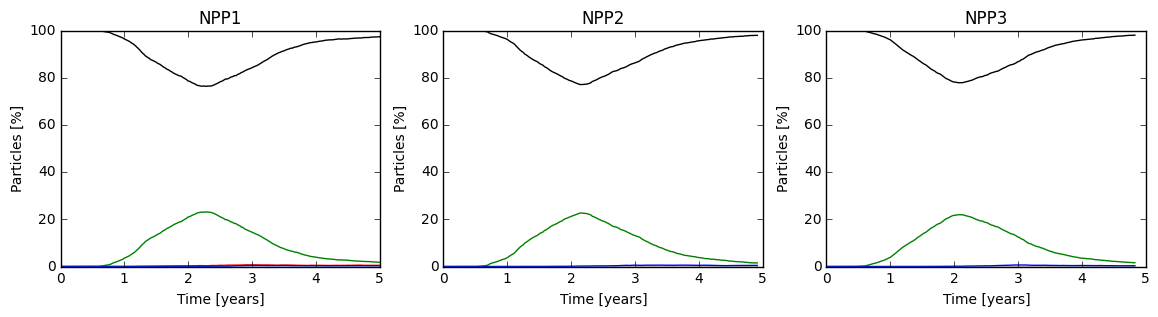

In [70]:
fig = plt.figure(figsize=(14,14))
i = 1
for NPP in NPPs:
    evo_zone1 = pickle_load(NPP + '_evo_zone1', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone2 = pickle_load(NPP + '_evo_zone2', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone3 = pickle_load(NPP + '_evo_zone3', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone4 = pickle_load(NPP + '_evo_zone4', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone5 = pickle_load(NPP + '_evo_zone5', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    total = np.ones(evo_zone2.shape[0])*10000
    total = total-evo_zone2-evo_zone3-evo_zone4-evo_zone5
    
    plt.subplot(4,3,i)
    plot1(NPP)
    i+=1
fig.tight_layout

# Penser aux masques !!

In [41]:
for t in range(166):#160, 166): #xround.shape[0]):

    if north_outside_RG.size==0. and east_outside_RG.size==0. and west_outside_RG.size==0.:
        print 'particles in Ross Gyre'
        zone1.append(10000)
        
    if north_outside_RG.size>0.:
        print 'Some particles are outside of Ross Gyre to the North'
        zone2.append(north_outside_RG.size)
        zone1.append(10000-north_outside_RG.size)
        
        
    if north_outside_RG.size==0. and east_outside_RG.size>0. and west_outside_RG.size==0.:
        print 'Some particles are outside of Ross Gyre to the East'
        zone3.append(east_outside_RG.size)
        zone1.append(10000-east_outside_RG.size)
        
    if north_outside_RG.size==0. and east_outside_RG.size==0. and west_outside_RG.size>0.:
    print 'Some particles are outside of Ross Gyre to the West'
    zone4.append(west_outside_RG.size)
    zone1.append(10000-west_outside_RG.size)
    
    if north_outside_RG.size==0. and east_outside_RG.size>0. and west_outside_RG.size>0.:
        print 'Some particles are outside of Ross Gyre to the West and the East'
        zone3.append(east_outside_RG.size)
        zone4.append(west_outside_RG.size)
        zone1.append(10000-east_outside_RG.size-west_outside_RG.size)
        
    #if north_outside_RG.size>0. and east_outside_RG.size>0.:
    #    humhum.append(p)
    #    print p
    #    print 'north :',north_outside_RG.size,', east :',east_outside_RG.size,', west :',west_outside_RG.size
    #    print 'LOOK : particle is North and East !'
    #zone1.append(10000-north_outside_RG.size-east_outside_RG.size-west_outside_RG.size)
    
        
#print ''     
#print 'Particles that stay in the Ross Gyre :', zone1
#print 'Particles that go North :', zone2
#print 'Particles that go East :', zone3
#print 'Particles that go West :', zone4
#print 'Total number of particles :', zone1+zone2+zone3+zone4

10
north : 0 , east : 0 , west : 0
particles in Ross Gyre
11
north : 0 , east : 0 , west : 0
particles in Ross Gyre
12
north : 0 , east : 0 , west : 0
particles in Ross Gyre
13
north : 0 , east : 0 , west : 0
particles in Ross Gyre
14
north : 0 , east : 0 , west : 0
particles in Ross Gyre
15
north : 0 , east : 0 , west : 0
particles in Ross Gyre
16
north : 0 , east : 0 , west : 0
particles in Ross Gyre
17
north : 0 , east : 0 , west : 0
particles in Ross Gyre
18
north : 0 , east : 5 , west : 0
Some particles are outside of Ross Gyre to the East
19
north : 0 , east : 12 , west : 0
Some particles are outside of Ross Gyre to the East
20
north : 0 , east : 24 , west : 0
Some particles are outside of Ross Gyre to the East
21
north : 0 , east : 46 , west : 0
Some particles are outside of Ross Gyre to the East
22
north : 0 , east : 53 , west : 0
Some particles are outside of Ross Gyre to the East
23
north : 0 , east : 67 , west : 0
Some particles are outside of Ross Gyre to the East
24
north 